# PM4 - Data Analysis and Results

This notebook details the data analysis and the corresponding finding regarding our datasets containing Twitter data that was obtained via the Twitter API. There were four search queries used to gather these Tweets:
1. vaccines are poison
2. vaccines kill
3. vaccines cause aids
4. vaccines cause autism

## 1. Read in the Twitter data 

To work with the Twitter data we first load the corresponding csv files to our notebook. It is important to note that due to the limitations of the Twitter API, the collected data only encompasses two weeks of data collected in mid-September 2020. The tweets from each search query as well as for each collection period is stored in a different file.

In [193]:
# import necessary libraries to work with our data
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
aids_data = pd.read_csv('vaccinescauseaids_twitter_data.csv') # first week of data
aids_data_new = pd.read_csv('vaccines+cause+aids_twitter_data_new.csv') # second week of data

In [17]:
vaccines_kill = pd.read_csv('vaccineskill_twitter_data.csv') # first week of data
vaccines_kill_new = pd.read_csv('vaccines_kill_twitter_data_new.csv', lineterminator='\n')  # second week of data

In [18]:
autism_data = pd.read_csv("vaccinescauseautism_twitter_data.csv", lineterminator='\n')
autism_data_new = pd.read_csv("vaccines+cause+autism_twitter_data_new.csv")

In [19]:
vaccines_poison = pd.read_csv('vaccinesarepoison_twitter_data.csv') # first week of data
vaccines_poison_new = pd.read_csv('vaccines+are+poison_twitter_data_new.csv', lineterminator='\n')  # second week of data

In [20]:
vaccines_poison.head() # get a better sense of the data

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,RaevenRaeyne,Truth Seeker * Wanderer * Starseeds* 🌏 💫 👽 🛸 ...,Earth,882,567,10342,2018-11-20 00:28:04,2020-09-21 15:46:36,1,@BackIam5 @QohnG After working in a pharmacy w...,[]
1,Jennife08379969,"Mom to three amazing kids, conservative, Chris...","Washington, USA",1660,1880,15406,2017-12-09 08:34:24,2020-09-21 15:39:21,1,@Frank38328140 @marklevinshow There's a reason...,[]
2,borderowl62,Black Labs Matter. Dont let the 1% divide us. ...,North Britain,248,233,3379,2020-04-15 11:40:32,2020-09-21 15:35:24,5,@HegKong All vaccines are pure poison Fraud th...,[]
3,NumberOneMelon,Same,NaN,55,58,325,2019-06-30 06:54:00,2020-09-21 14:50:16,0,Here’s a trivia for ya \n\n1. The Earth ISNT f...,[]
4,AmyLaskyMD,Academic OBGYN | Pelvic Sorceress & Life-Bring...,"Port Jefferson, NY",965,4671,5986,2017-08-12 14:27:14,2020-09-21 14:19:11,80,Mine is “tOxInS.”\n\nLike water can be a poiso...,[]


## 2. Comparing the volume of Tweets
After having loaded the different datasets we would like to compare them and determine the number of Tweets that each of the search queries specified above yielded. 

In [77]:
# gather all datasets 
datasets = [aids_data, aids_data_new, vaccines_kill, vaccines_kill_new, autism_data, autism_data_new, 
            vaccines_poison, vaccines_poison_new]

In [78]:
# gathering the number of rows in each dataset
numRows = [data.shape[0] for data in datasets] 

In [79]:
# creating a column with our data set names
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

names = [get_df_name(d) for d in datasets] 


In [80]:
tweetTable = pd.DataFrame(names, columns = ['dataset'])
tweetTable['numtweets'] = numRows

In [81]:
tweetTable

,dataset,numtweets
0,aids_data,186
1,aids_data_new,496
2,vaccines_kill,630
3,vaccines_kill_new,1497
4,autism_data,5194
5,autism_data_new,1808
6,vaccines_poison,632
7,vaccines_poison_new,240


In [82]:
# number of tweets in our datasets 
tweetTable['numtweets'].sum()

10683

## 3. Identifying top accounts
In the next step, we will look at each dataset individually as well as the combined datasets for each query to identify the users who have tweeted the most

In [110]:
# merging the datasets, one for each search query
aids = [aids_data, aids_data_new]
aids_all = pd.concat(aids)

kill = [vaccines_kill, vaccines_kill_new]
kill_all = pd.concat(kill)

autism = [autism_data, autism_data_new]
autism_all = pd.concat(autism)

poison = [vaccines_poison, vaccines_poison_new]
poison_all = pd.concat(poison)

datasets_merged = [aids_all,kill_all,autism_all,poison_all]

all_data = pd.concat(datasets) # datasets will all tweets

In [118]:
import collections
import itertools

def topAccounts(data, topNum):
    """
    given a datasets returns the specified number (topNum of them) of accounts who tweeted the most 
    """
    freqCount = data['username'].value_counts() # counts the frequency of each username
    freqDict = freqCount.to_dict() # creates a frequency dictionary
    
    sorted_data = collections.OrderedDict(freqDict) # conversion to a sorted dictionary
    # Initialize limit  
    N = topNum # number of top tweeters we want to collect  
    topTweeters = dict(itertools.islice(sorted_data.items(), N))
    return topTweeters

## 3.1 Identifying top accounts in individual datasets

In [119]:
allTopAccounts = [topAccounts(d,10) for d in datasets] # identifies top 10 accounts in each dataset

allTopAccounts[3] # a sample output for our dataset for the search query vaccines kill

{'yyoo11122': 29,
 'JambunathanC': 22,
 'EpigeneticWhisp': 9,
 'ByronHsu2': 7,
 'Badassherbalist': 6,
 'IkNihcas': 5,
 'garrisonrich1': 5,
 'leighwh68987693': 5,
 'TomthunkitsMind': 4,
 'Philosophystew': 4}

In [120]:
tweetTable["topaccounts"] = allTopAccounts # add a column to our table about our tweet data 

In [121]:
tweetTable # how our table looks after adding column with top accounts 

,dataset,numtweets,topaccounts
0,aids_data,186,"{'PaulVCooper1': 8, 'jeremynewberger': 4, 'drg..."
1,aids_data_new,496,"{'rosanthony3': 3, 'jesteinf': 3, 'PattiDB': 3..."
2,vaccines_kill,630,"{'Patriot___News': 8, 'bridb': 6, 'Soliloquyof..."
3,vaccines_kill_new,1497,"{'yyoo11122': 29, 'JambunathanC': 22, 'Epigene..."
4,autism_data,5194,"{'PaulVCooper1': 32, '80sRetro_Girl': 32, 'Lot..."
5,autism_data_new,1808,"{'80sRetro_Girl': 23, 'LotusOak2': 15, 'Epigen..."
6,vaccines_poison,632,"{'Patriot___News': 8, 'bridb': 6, 'rudee_al': ..."
7,vaccines_poison_new,240,"{'EpigeneticWhisp': 10, 'MelindaFirst100': 4, ..."


## 3.2 Identifying top accounts for each search query
After having examined the top accounts for each dataset we look at the data for each search query as a whole and look to see if there are any differences in comparison to our findings from before.

In [189]:
topAcct = [topAccounts(d,10) for d in datasets_merged]
accountFreq = [topAccounts(d,d.shape[0]) for d in datasets_merged] # frequency of all accounts

In [141]:
# extract names of our merged datasets 
datasetNames = [get_df_name(df) for df in datasets_merged]

# create dataframe with our account data 
topAcct_df = pd.DataFrame(topAcct).T
topAcct_df.columns = datasetNames

topAcct_df # top accounts for all datasets and where they appear

,aids_all,kill_all,autism_all,poison_all
PaulVCooper1,9.0,NaN,34.0,NaN
jeremynewberger,4.0,NaN,NaN,NaN
PattiDB,3.0,NaN,NaN,NaN
yepitsthatmatt,3.0,NaN,NaN,NaN
jesteinf,3.0,NaN,NaN,NaN
rosanthony3,3.0,NaN,NaN,NaN
jneutron1969,3.0,NaN,NaN,NaN
srobinson2020,2.0,NaN,NaN,NaN
alexpokerguy,2.0,NaN,NaN,NaN
CindyDeetz,2.0,NaN,NaN,NaN


In [139]:
topAcct_df.shape # gives us the number of top accounts over all 4 accounts 

(33, 4)

In [195]:
dataFramesList = [pd.DataFrame(accountFreq[i].items(), columns = ["username", "numTweets"]) 
                  for i in range(len(datasets_merged))]
dataFramesList

[            username  numTweets
 0       PaulVCooper1          9
 1    jeremynewberger          4
 2            PattiDB          3
 3     yepitsthatmatt          3
 4           jesteinf          3
 ..               ...        ...
 554       MartyrWith          1
 555     MonkyThunder          1
 556  murrayjohnsonjr          1
 557       theTonyGee          1
 558    CreateToRebel          1
 
 [559 rows x 2 columns],
              username  numTweets
 0           yyoo11122         29
 1        JambunathanC         22
 2     EpigeneticWhisp         13
 3      Patriot___News          8
 4           ByronHsu2          7
 ...               ...        ...
 1591     CoyleMalcolm          1
 1592   NadiaAbril1991          1
 1593       cuddle0000          1
 1594           AS332L          1
 1595  Barbara45815793          1
 
 [1596 rows x 2 columns],
              username  numTweets
 0       80sRetro_Girl         55
 1           LotusOak2         45
 2      andrewmorrisuk         39
 3   

In [205]:
def plotFrequency(dataframe, dataName):
    ax = dataframe.groupby('numTweets').count().plot.bar()
    plt.title("Number of tweets for users from " + dataName + " dataset")
    ax.set_xlabel("number of tweets")
    ax.set_ylabel("frequency")


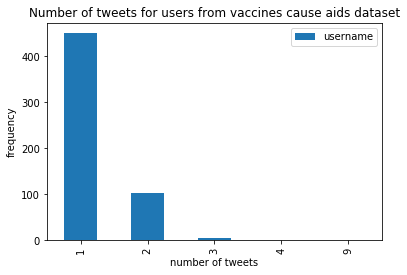

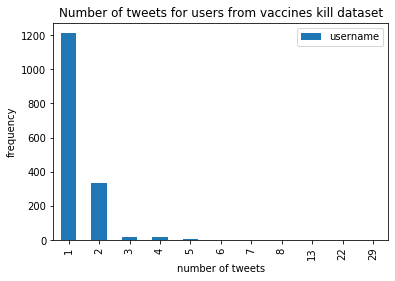

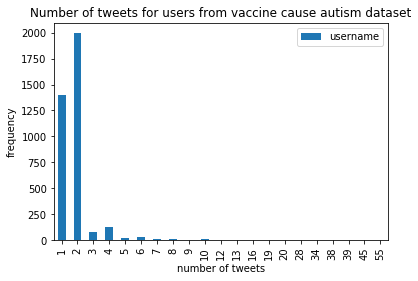

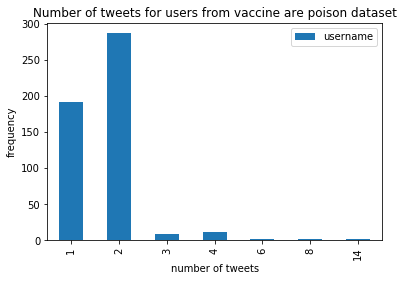

In [209]:
#creating frequency plots for all queries
plotFrequency(dataFramesList[0], "vaccines cause aids")
plotFrequency(dataFramesList[1], "vaccines kill")
plotFrequency(dataFramesList[2], "vaccine cause autism")
plotFrequency(dataFramesList[3], "vaccine are poison")

## 3.3 Top accounts overall
After having examined the top accounts for each search query we go to find the top accounts from our dataset of all tweets.

In [126]:
topAll = topAccounts(all_data, 50)

In [211]:
topAll_df = pd.DataFrame(topAll.items(), columns = ["user", "numTweets"]) # dataframe with top 50 accounts 
topAll_df.head(10) # look at top 10 accounts in our dataframe

,user,numTweets
0,EpigeneticWhisp,65
1,80sRetro_Girl,56
2,PaulVCooper1,47
3,LotusOak2,45
4,andrewmorrisuk,39
5,yyoo11122,29
6,NotATweeter16,28
7,acagoldsmith,28
8,lulu111593,24
9,JambunathanC,22


In [212]:
allAcctFreq = topAccounts(all_data, all_data.shape[0])
allFreq_df = pd.DataFrame(allAcctFreq.items(), columns = ["user", "numTweets"]) 
allFreq_df.head(10)

,user,numTweets
0,EpigeneticWhisp,65
1,80sRetro_Girl,56
2,PaulVCooper1,47
3,LotusOak2,45
4,andrewmorrisuk,39
5,yyoo11122,29
6,NotATweeter16,28
7,acagoldsmith,28
8,lulu111593,24
9,JambunathanC,22


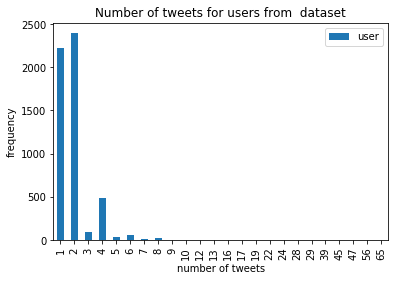

In [213]:
# plotting the frequency of tweets
plotFrequency(allFreq_df, "")

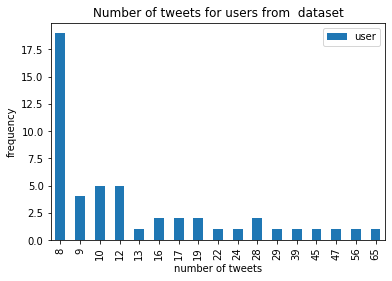

In [214]:
#plotting only top 50 accounts
plotFrequency(topAll_df, "")

# 4. Creating graphical representation of tweet frequency

As we saw in part 3.2, there were multiple accounts that appeared in the results for the different search queries, meaning that particular users were more active/interacted with different communities within the anti-vaccination community encompassed in the four search queries. Therefore in the next step we look create a graph where the nodes represent the different search queries and accounts and the edges represent a connection between a search query and account if it appears in that search query. The weight of the edge is determined by the number of tweets that partular user wrote. 